# Exercise 2

## Part I: KNN Classifier

In this exercise we implement the KNN for classification of the Iris dataset

First, understand the dataset and its contents by finding the keys and reading the description of the dataset by running the code block below 

In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris() #creates an object that contains the iris dataset
print('Keys of the iris_dataset is:', iris_dataset.keys())

Keys of the iris_dataset is: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

A) Classify the Iris species with KNN approach using the first two feature only (X_train[:, : 2], X_test[:, : 2]), and check the accuracy as K changes. Let K takes the values [1, 5, 10, 15]. No need to scale features.
In the code, use random_state=100 in train_test_split as below.

Plot the accuracy and comment on your result

[0.7368421052631579, 0.8421052631578947, 0.8421052631578947, 0.7631578947368421]


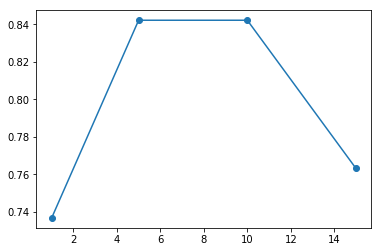

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


test_accuracy=[] # you can use the .append to test_accuracy to store the result
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)

list_accuracy=[]
#complete your code here
for k in [1,5,10,15]:
 knn=KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train[:,:2],Y_train)
 accuracy=knn.score(X_test[:,:2],Y_test)
 list_accuracy.append(accuracy)

print(list_accuracy)

plt.plot([1,5,10,15],list_accuracy,marker='o')


In [14]:
#### Conclusion: The accuracy increases for k=10,15 but again drops as we further increase k

B) Use the Iris example, and find the accuracy of the KNN approach with K=5 when different number of features is used without scaling. 
Hint: To use N_features only from training data use: X_train[:, : N_features ]
Write down the accuracy when using one, two, three, and the four features


[0.7894736842105263, 0.8421052631578947, 0.9210526315789473, 0.9736842105263158]


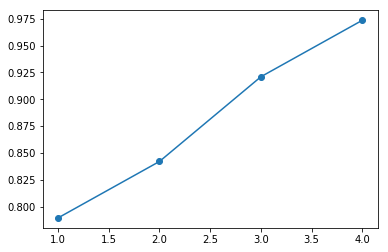

In [5]:
# You can write you code here
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn.model_selection import train_test_split




X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)

list_accuracy=[]
#complete your code here
for n in [1,2,3,4]:
 knn=KNeighborsClassifier(n_neighbors=5)
 knn.fit(X_train[:,:n],Y_train)
 accuracy=knn.score(X_test[:,:n],Y_test)
 list_accuracy.append(accuracy)

print(list_accuracy)

plt.plot([1,2,3,4],list_accuracy,marker='o')

C) Repeat B when feature scaling with MinMaxScaler is used

[0.7894736842105263, 0.8421052631578947, 0.9736842105263158, 0.9736842105263158]


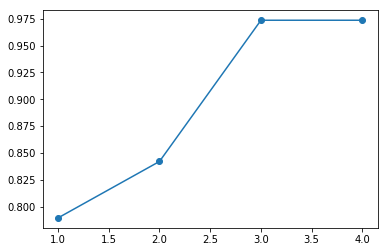

In [6]:
# You can write you code here
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)

scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)
list_accuracy=[]

#complete your code here
for n in [1,2,3,4]:
 knn=KNeighborsClassifier(n_neighbors=5)
 knn.fit(X_train_transformed[:,:n],Y_train)
 accuracy=knn.score(X_test_transformed[:,:n],Y_test)
 list_accuracy.append(accuracy)

print(list_accuracy)

plt.plot([1,2,3,4],list_accuracy,marker='o')

## Part 2: Linear Regression

2-A) With the advertising dataset, use the statsmodels module in python to find the P-value of the TV feature and its associated confidence interval. Does the confidence interval include the value of Zero? What does that imply. Comment on the association between the TV and sales.

In [3]:
from pandas import read_csv
import statsmodels.formula.api as smf
AdvertisingData=read_csv('Advertising.csv')

# write you code here to answer the above question
model=smf.ols('Sales~TV',AdvertisingData)
Fitting_results=model.fit()
print(Fitting_results.summary().tables[1])

print('P-values are : \n',Fitting_results.pvalues)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
P-values are : 
 Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [ ]:
##Conclusion: No, the confidence interval doesn't include the value of Zero which implies that there is a strong association between TV and Sales

2-B) Using the Scikit-Learn library, fit a linear regression model using advertising trianing set, then find the mean square error of the fitted model using test data. Use random_state= 0 in the train_test_split function.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

AdvertisingData=read_csv('Advertising.csv')
X = AdvertisingData[['Radio', 'TV','Newspaper']].values
Y = AdvertisingData.Sales
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

# write you code here to answer the above question
linreg=LinearRegression().fit(X_train,Y_train)

Target_predicted=linreg.predict(X_test)
MSE=mean_squared_error(Y_test,Target_predicted)

print('The Mean Squared Error is :',MSE)



The Mean Squared Error is : 4.012497522917106
